<a href="https://colab.research.google.com/github/pragyahub12/-differential-learning-using-vision-based-models/blob/main/Differential_learning_using_vision_based_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan 11 15:57:28 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [44]:
pip install pillow==9.5.0

# **Using Yolo : For Object Detection**

**YOLOv8 enhances the detection of small objects through improved anchor mechanisms and multi-scale feature aggregation. This is essential for detecting small features in birds, such as claws or eyes, which may be missed by older versions**

In [55]:
%cd /content/drive/MyDrive/yolo
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=640 plots=True project=/content/drive/MyDrive/yolo/exp name=custom_training



/content/drive/MyDrive/yolo
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_lo

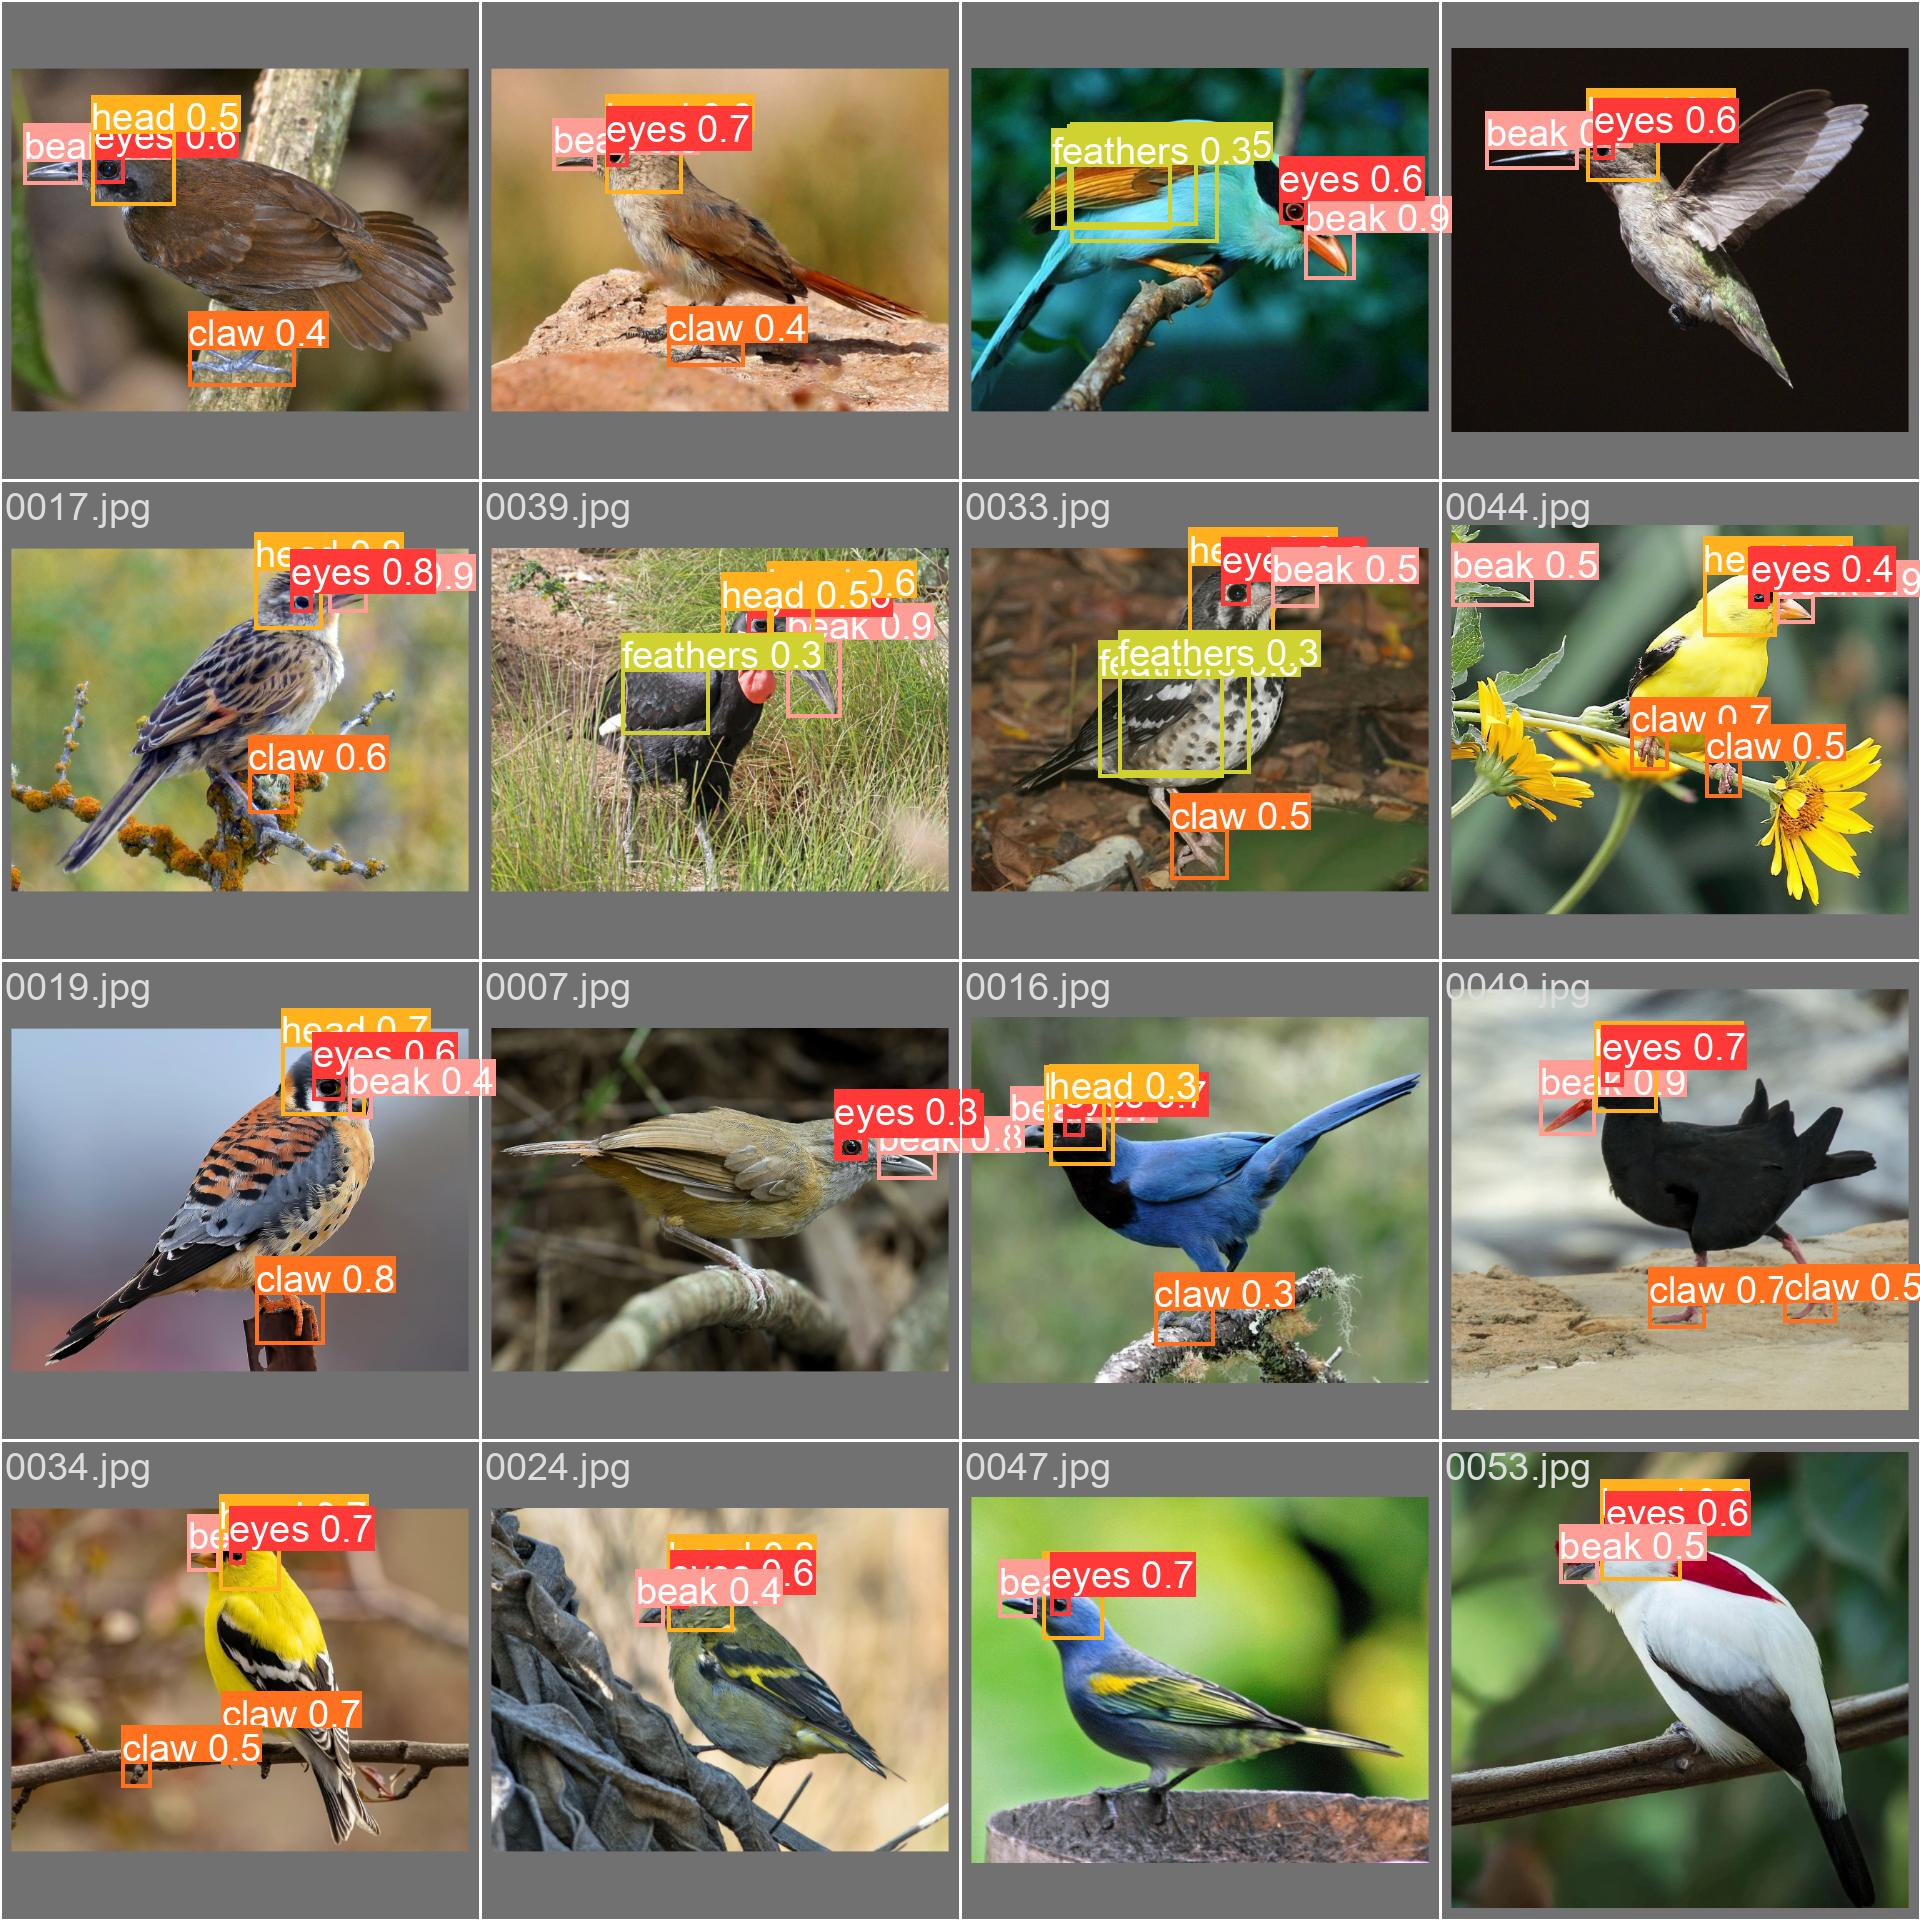

In [17]:
Image(filename='exp/custom_training16/val_batch1_pred.jpg',width=600)

**Confusion Matrix**

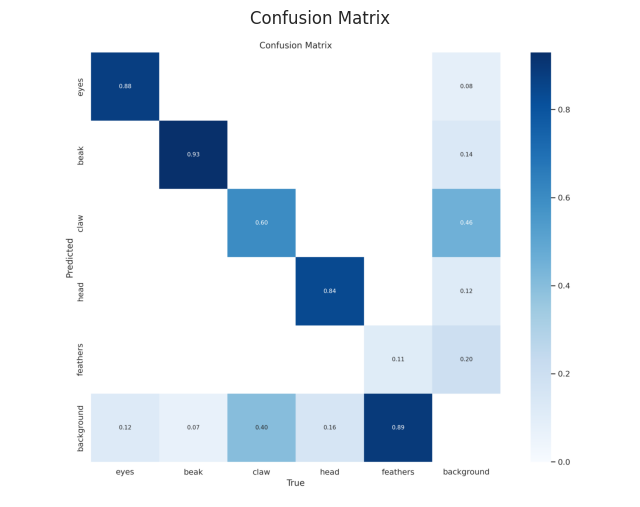

In [48]:
import cv2
import matplotlib.pyplot as plt

# Path to your confusion matrix image
confusion_matrix_path = "/content/drive/MyDrive/yolo/exp/custom_training16/confusion_matrix.png"

# Load and display the confusion matrix
image = cv2.imread(confusion_matrix_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct color display

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better visualization
plt.title("Confusion Matrix")
plt.show()


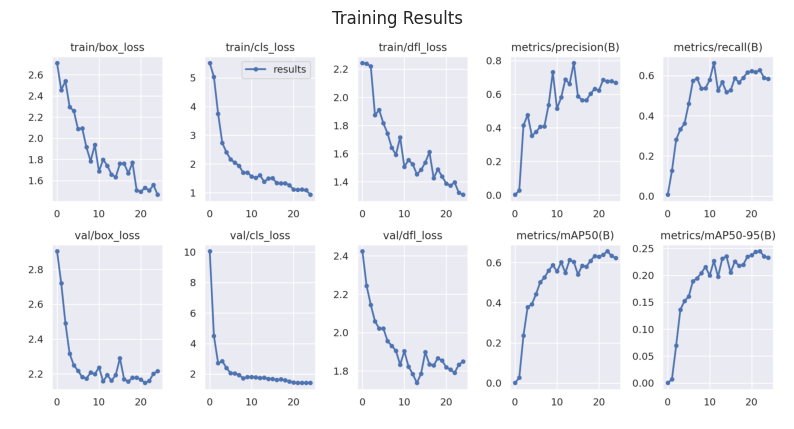

In [53]:
import cv2
import matplotlib.pyplot as plt

# Paths to images

results_path = "/content/drive/MyDrive/yolo/exp/custom_training16/results.png"


# Display Results (Loss, Precision, Recall, mAP)
results_image = cv2.imread(results_path)
results_image = cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(results_image)
plt.axis('off')
plt.title("Training Results")
plt.show()
#train/box_loss: This shows the box regression loss during training. It measures how well the model predicts bounding box locations. The decreasing trend indicates improvement as the model learns.
#train/cls_loss: This shows the classification loss during training, measuring the error in predicting class labels. The decreasing trend signifies that the model is getting better at classifying objects.
#train/dfl_loss: Likely "distribution focal loss" or similar, which focuses on refining bounding box prediction distributions. A decreasing trend means the model is improving its accuracy in localization.
#metrics/precision(B): Precision measures the proportion of true positive predictions out of all positive predictions made by the model. The increase shows the model is reducing false positives over training.
#metrics/recall(B): Recall measures the proportion of true positives detected out of all actual positives. The rising trend indicates the model is capturing more relevant instances.

#val/box_loss: Validation box regression loss, analogous to training box loss but calculated on the validation set. A similar decreasing trend indicates the model generalizes well to unseen data.
#val/cls_loss: Validation classification loss, analogous to training cls loss. A decrease shows that the model's ability to classify objects generalizes well to the validation set.
#val/dfl_loss: Validation distribution loss, similar to the training equivalent. The decrease reflects improvement in bounding box localization on unseen data.
#metrics/mAP50(B): Mean Average Precision at IoU threshold 0.5, a standard object detection metric. The increasing trend shows improvement in the overall performance of the model.
#metrics/mAP50-95(B): Mean Average Precision over a range of IoU thresholds (0.5 to 0.95). This is a stricter metric, and its upward trend indicates the model is becoming robust at detecting objects with varying precision levels.

In [18]:
!yolo task=detect mode=val model=/content/drive/MyDrive/yolo/runs/detect/train2/weights/best.pt data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2025-0

In [19]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolo/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/Birds/test/images

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2025-0

In [37]:
import os
import cv2
#The function parse_yolo_labels reads a YOLO-format label file, extracts the bounding box information for detected objects, and converts the normalized coordinates into absolute pixel coordinates based on the dimensions of the corresponding image.
def parse_yolo_labels(label_path, image_width, image_height):
    """
    Parse YOLO label file to get bounding box coordinates.
    """
    yolo_output = []
    with open(label_path, 'r') as f:
        for line in f:
            # Format: class_id x_center y_center width height
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            # Convert to bounding box coordinates
            x_min = int((x_center - width / 2) * image_width)
            y_min = int((y_center - height / 2) * image_height)
            x_max = int((x_center + width / 2) * image_width)
            y_max = int((y_center + height / 2) * image_height)
            yolo_output.append((x_min, y_min, x_max, y_max, int(class_id)))
    return yolo_output


def crop_features(yolo_output, image_path, save_dir, class_names):
    """
    Crop features from an image based on YOLO output and save them to specified directory.
    """
    # Read the image
    image = cv2.imread(image_path)
    image_name = os.path.basename(image_path).split('.')[0]

    for i, (x_min, y_min, x_max, y_max, class_id) in enumerate(yolo_output):
        # Crop the region
        crop = image[y_min:y_max, x_min:x_max]
        # Create class-specific directories if not exist
        class_dir = os.path.join(save_dir, class_names[class_id])
        os.makedirs(class_dir, exist_ok=True)
        # Save the cropped image
        save_path = os.path.join(class_dir, f"{image_name}_crop_{i}.jpg")
        cv2.imwrite(save_path, crop)
        print(f"Saved crop: {save_path}")


def main():
    # Define paths
    images_dir = "/content/drive/MyDrive/yolo/Birds/test/images"
    labels_dir = "/content/drive/MyDrive/yolo/Birds/test/labels"
    save_dir = "/content/drive/MyDrive/yolo/Birds/cropped_features"

    # Define class names (based on your YOLO model)
    class_names = ["eyes", "beak", "claw", "head", "feathers"]

    # Ensure save directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Process each image and its corresponding label
    for image_name in os.listdir(images_dir):
        if image_name.endswith(('.jpg', '.png')):
            image_path = os.path.join(images_dir, image_name)
            label_path = os.path.join(labels_dir, image_name.replace('.jpg', '.txt'))

            if not os.path.exists(label_path):
                print(f"Label file not found for {image_name}, skipping...")
                continue

            # Read image to get dimensions
            image = cv2.imread(image_path)
            image_height, image_width, _ = image.shape

            # Parse YOLO labels
            yolo_output = parse_yolo_labels(label_path, image_width, image_height)

            # Crop and save features
            crop_features(yolo_output, image_path, save_dir, class_names)


if __name__ == "__main__":
    main()


Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/eyes/0004_crop_0.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/beak/0004_crop_1.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/head/0004_crop_2.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/feathers/0004_crop_3.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/eyes/0011_crop_0.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/beak/0011_crop_1.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/claw/0011_crop_2.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/head/0011_crop_3.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/feathers/0011_crop_4.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/eyes/0001_crop_0.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/beak/0001_crop_1.jpg
Saved crop: /content/drive/MyDrive/yolo/Birds/cropped_features/claw/

# **Feature Based Comparision**

SSIM Score for full images: 0.0084
The full images are very different.


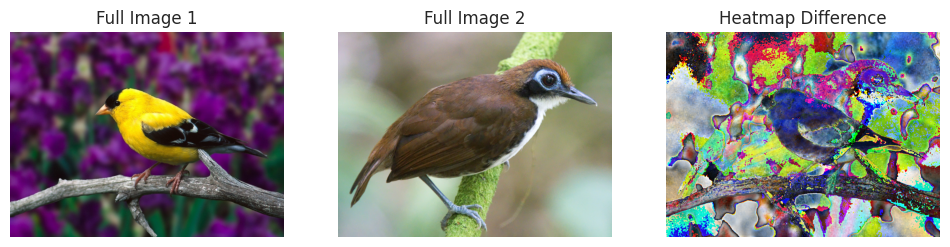

SSIM Score for eyes: -0.0554
The 'eyes' is very different.


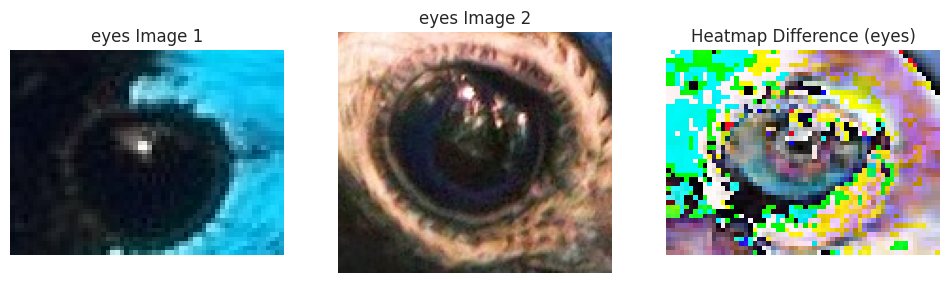

SSIM Score for beak: 0.1363
The 'beak' is very different.


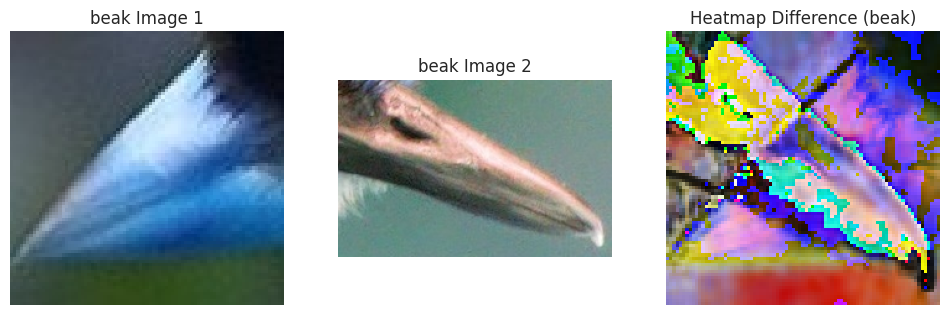

SSIM Score for claw: 0.0607
The 'claw' is very different.


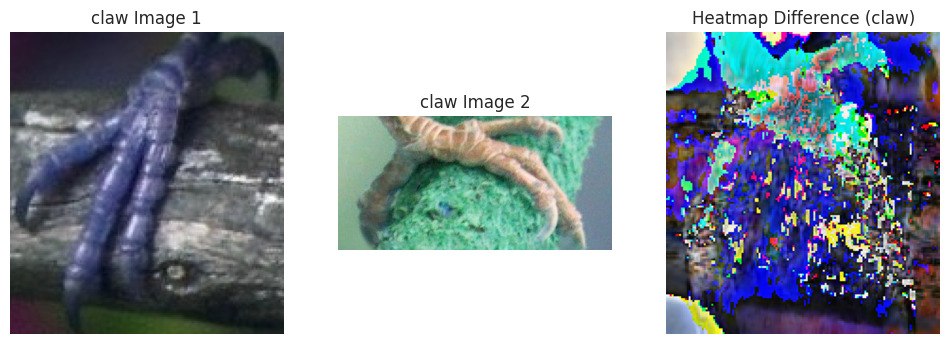

SSIM Score for head: -0.0158
The 'head' is very different.


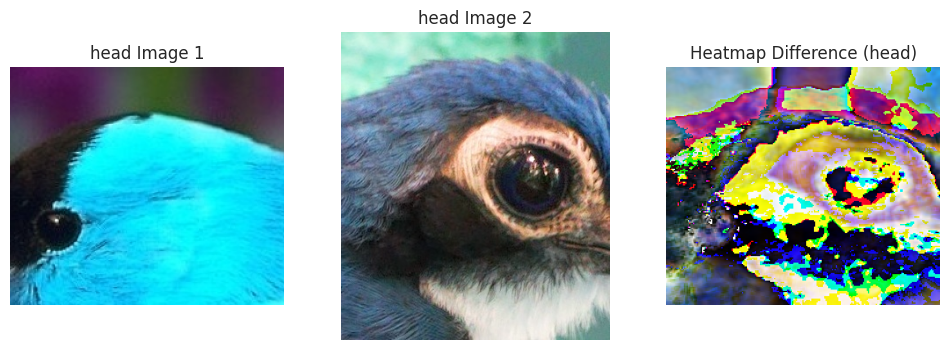

SSIM Score for feathers: 0.2919
The 'feathers' is very different.


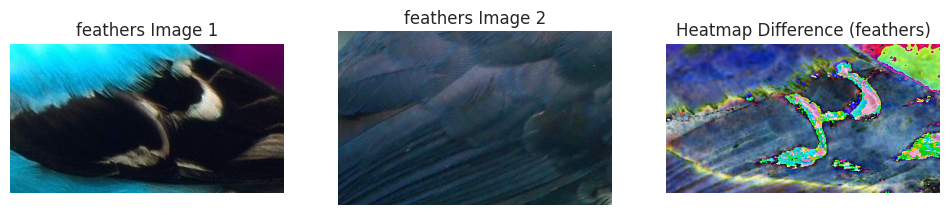

In [41]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Set up paths (ensure this is correct)
test_images_folder = "/content/drive/MyDrive/yolo/Birds/test/images"
cropped_features_folder = "/content/drive/MyDrive/yolo/Birds/cropped_features"
output_folder = "/content/drive/MyDrive/yolo/Birds/results"

def get_feature_path(feature, image_id, crop_version):
    """Returns the path for the cropped feature image based on feature name, image ID, and crop version."""
    return os.path.join(cropped_features_folder, feature, f"{image_id:04d}_crop_{crop_version}.jpg")

def draw_bounding_box(image_path, feature, bbox, output_path, feature_name):
    """Draw bounding box on the image and save it."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image at {image_path}")
        return

    x, y, w, h = bbox
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, feature_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    cv2.imwrite(output_path, img)

def calculate_difference(image1_path, image2_path):
    """Calculate the difference between two images using SSIM."""
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    if image1 is None or image2 is None:
        raise FileNotFoundError(f"Image not found at {image1_path} or {image2_path}")

    if image1.shape != image2.shape:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    score, diff = ssim(image1, image2, full=True, win_size=3, multichannel=True)
    diff = (diff * 255).astype("uint8")

    return diff, score

def check_and_compare_features(image_id1, image_id2, feature, crop_version):
    """Check if feature images exist for both IDs, compare using heatmap if found."""
    feature_path1 = get_feature_path(feature, image_id1, crop_version)
    feature_path2 = get_feature_path(feature, image_id2, crop_version)

    if not os.path.exists(feature_path1) or not os.path.exists(feature_path2):
        print(f"Feature image(s) for '{feature}' not found.")
        return

    diff, score = calculate_difference(feature_path1, feature_path2)

    if score > 0.8:
        similarity_message = f"The '{feature}' is very similar."
    elif 0.5 < score <= 0.8:
        similarity_message = f"The '{feature}' has some differences."
    elif 0.3 < score <= 0.5:
        similarity_message = f"The '{feature}' is quite different."
    else:
        similarity_message = f"The '{feature}' is very different."

    print(f"SSIM Score for {feature}: {score:.4f}")
    print(similarity_message)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.imread(feature_path1))
    plt.title(f'{feature} Image 1')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.imread(feature_path2))
    plt.title(f'{feature} Image 2')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(diff, cmap='hot')
    plt.title(f'Heatmap Difference ({feature})')
    plt.axis('off')

    plt.show()

def compare_full_images(image_id1, image_id2):
    image_path1 = os.path.join(test_images_folder, f"{image_id1:04d}.jpg")
    image_path2 = os.path.join(test_images_folder, f"{image_id2:04d}.jpg")

    if not os.path.exists(image_path1) or not os.path.exists(image_path2):
        print("Full images not found.")
        return

    diff, score = calculate_difference(image_path1, image_path2)

    if score > 0.8:
        similarity_message = "The full images are very similar."
    elif 0.5 < score <= 0.8:
        similarity_message = "The full images have some differences."
    elif 0.3 < score <= 0.5:
        similarity_message = "The full images are quite different."
    else:
        similarity_message = "The full images are very different."

    print(f"SSIM Score for full images: {score:.4f}")
    print(similarity_message)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path1), cv2.COLOR_BGR2RGB))
    plt.title('Full Image 1')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path2), cv2.COLOR_BGR2RGB))
    plt.title('Full Image 2')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(diff, cmap='hot')
    plt.title('Heatmap Difference')
    plt.axis('off')

    plt.show()

features = {"eyes": "0", "beak": "1", "claw": "2", "head": "3", "feathers": "4"}
compare_full_images(image_id1=25, image_id2=27)

for feature, crop_version in features.items():
    check_and_compare_features(25, 27, feature, crop_version)

SSIM Score for full images: 0.3940
The full images are quite different.


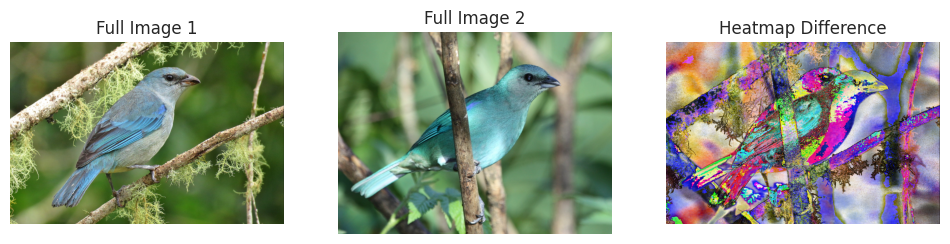

SSIM Score for eyes: 0.1709
The 'eyes' is very different.


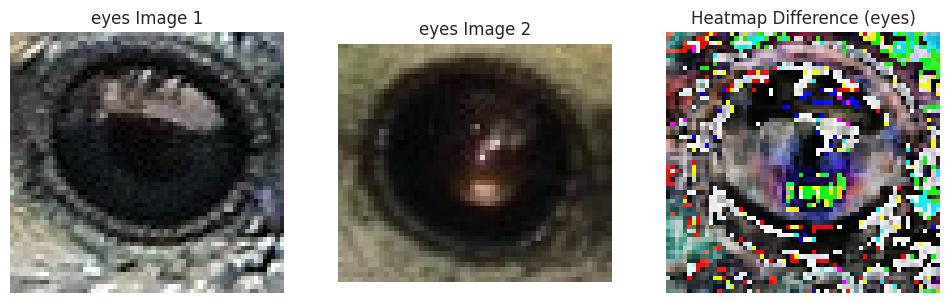

SSIM Score for beak: 0.0211
The 'beak' is very different.


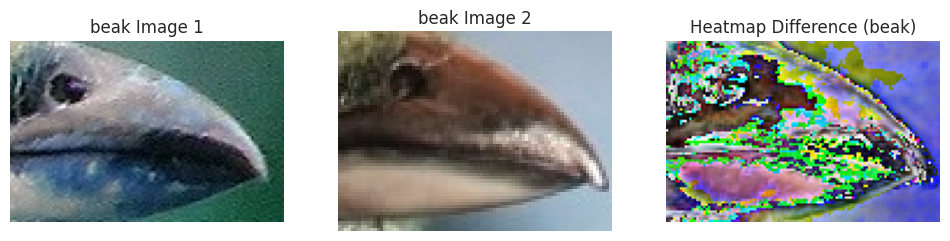

Feature image(s) for 'claw' not found.
SSIM Score for head: 0.3871
The 'head' is quite different.


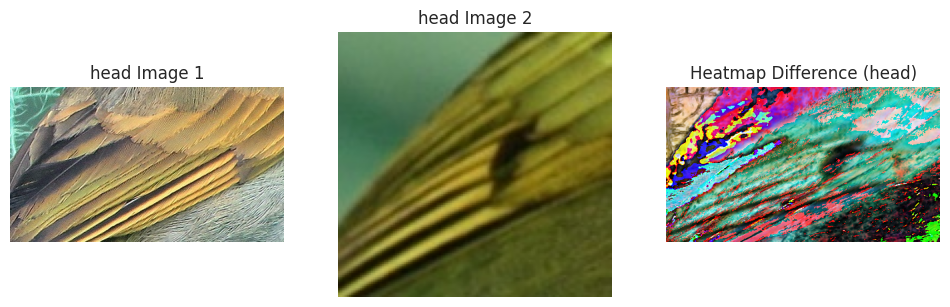

Feature image(s) for 'feathers' not found.


In [43]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Set up paths (ensure this is correct)
test_images_folder = "/content/drive/MyDrive/yolo/Birds/test/images"
cropped_features_folder = "/content/drive/MyDrive/yolo/Birds/cropped_features"
output_folder = "/content/drive/MyDrive/yolo/Birds/results"

def get_feature_path(feature, image_id, crop_version):
    """Returns the path for the cropped feature image based on feature name, image ID, and crop version."""
    return os.path.join(cropped_features_folder, feature, f"{image_id:04d}_crop_{crop_version}.jpg")

def draw_bounding_box(image_path, feature, bbox, output_path, feature_name):
    """Draw bounding box on the image and save it."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image at {image_path}")
        return

    x, y, w, h = bbox
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, feature_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    cv2.imwrite(output_path, img)

def calculate_difference(image1_path, image2_path):
    """Calculate the difference between two images using SSIM."""
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    if image1 is None or image2 is None:
        raise FileNotFoundError(f"Image not found at {image1_path} or {image2_path}")

    if image1.shape != image2.shape:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    score, diff = ssim(image1, image2, full=True, win_size=3, multichannel=True)
    diff = (diff * 255).astype("uint8")

    return diff, score

def check_and_compare_features(image_id1, image_id2, feature, crop_version):
    """Check if feature images exist for both IDs, compare using heatmap if found."""
    feature_path1 = get_feature_path(feature, image_id1, crop_version)
    feature_path2 = get_feature_path(feature, image_id2, crop_version)

    if not os.path.exists(feature_path1) or not os.path.exists(feature_path2):
        print(f"Feature image(s) for '{feature}' not found.")
        return

    diff, score = calculate_difference(feature_path1, feature_path2)

    if score > 0.8:
        similarity_message = f"The '{feature}' is very similar."
    elif 0.5 < score <= 0.8:
        similarity_message = f"The '{feature}' has some differences."
    elif 0.3 < score <= 0.5:
        similarity_message = f"The '{feature}' is quite different."
    else:
        similarity_message = f"The '{feature}' is very different."

    print(f"SSIM Score for {feature}: {score:.4f}")
    print(similarity_message)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.imread(feature_path1))
    plt.title(f'{feature} Image 1')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.imread(feature_path2))
    plt.title(f'{feature} Image 2')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(diff, cmap='hot')
    plt.title(f'Heatmap Difference ({feature})')
    plt.axis('off')

    plt.show()

def compare_full_images(image_id1, image_id2):
    image_path1 = os.path.join(test_images_folder, f"{image_id1:04d}.jpg")
    image_path2 = os.path.join(test_images_folder, f"{image_id2:04d}.jpg")

    if not os.path.exists(image_path1) or not os.path.exists(image_path2):
        print("Full images not found.")
        return

    diff, score = calculate_difference(image_path1, image_path2)

    if score > 0.8:
        similarity_message = "The full images are very similar."
    elif 0.5 < score <= 0.8:
        similarity_message = "The full images have some differences."
    elif 0.3 < score <= 0.5:
        similarity_message = "The full images are quite different."
    else:
        similarity_message = "The full images are very different."

    print(f"SSIM Score for full images: {score:.4f}")
    print(similarity_message)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path1), cv2.COLOR_BGR2RGB))
    plt.title('Full Image 1')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path2), cv2.COLOR_BGR2RGB))
    plt.title('Full Image 2')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(diff, cmap='hot')
    plt.title('Heatmap Difference')
    plt.axis('off')

    plt.show()

features = {"eyes": "0", "beak": "1", "claw": "2", "head": "3", "feathers": "4"}
compare_full_images(image_id1=89, image_id2=90)

for feature, crop_version in features.items():
    check_and_compare_features(89,90 , feature, crop_version)